In [1]:
import os
import glob
from utils_gfat import disdrometer as dd
from utils_gfat import parsivelConverter1b as pc1b

#import csv
import numpy as np
import os
import pandas as pd

import time
import datetime as dt
#import calendar

import netCDF4 as nc
from netCDF4 import Dataset
from netCDF4 import date2num
#import io
import xarray as xr

#import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
dir0 = 'Y:\\datos\\parsivel\\0a'
dir1 = 'Y:\\datos\\parsivel\\1a'
dir2 = 'Y:\\datos\\parsivel\\1b'
dateini = '20191120'
dateend = '20191121'

In [3]:
# logging.basicConfig(filename='LOG_FILENAME.log')
inidate = dd.dt.datetime.strptime(dateini,'%Y%m%d')
enddate = dd.dt.datetime.strptime(dateend,'%Y%m%d')
date_ = inidate 
print(date_)
while date_ <= enddate:
    print('Processing!')
    year = dd.dt.datetime.strftime(date_,'%Y')
    month = dd.dt.datetime.strftime(date_,'%m')
    outputdir = dd.os.path.join(dir1, year, month)
    file0a = dd.os.path.join(dir0, year, month, '%s_UGR.mis' % dd.dt.datetime.strftime(date_,'%Y%m%d'))        
    if dd.os.path.isfile(file0a):
        print('%s found!' % file0a)
#         logging.info('%s found!' % file0a)
        file1a = file0a.replace('0a', '1a')
        pc1b.cleanMIS(file0a, file1a)
        if dd.os.path.isfile(file1a):
#             logging.info('%s found!' % file1a)
            print('%s found!' % file1a)            
            file1b = file1a.replace('1a', '1b')
            file1b = file1b.replace('mis', 'nc')
            dd.to_nc(file1a, file1b)    
            if dd.os.path.isfile(file1b):
#                 logging.info('%s successfully converted!' % file1b)
                print('%s successfully converted!' % file1b)
                print('file0a: %s' % file0a)
                print('file1a: %s' % file1a)
                print('file1b: %s' % file1b)
            else:
#                 logging.error('%s conversion to 1b-level FAILED!' % file0a)
                print('%s conversion to 1b-level FAILED!' % file0a)
        else:
#             logging.critical('%s conversion to 1a-level FAILED!' % file0a)
            print('%s conversion to 1a-level FAILED!' % file0a)
    else:
#         logging.info('%s not found.' % file0a)
        print('%s not found.' % file0a)
    date_ = date_ + dd.dt.timedelta(days=1)    
    print('Next day: %s' % dd.dt.datetime.strftime(date_,'%Y%m%d'))
print('Finished!')

2019-11-20 00:00:00
Processing!
Y:\datos\parsivel\0a\2019\11\20191120_UGR.mis not found.
Next day: 20191121
Processing!
Y:\datos\parsivel\0a\2019\11\20191121_UGR.mis found!
Y:\datos\parsivel\1a\2019\11\20191121_UGR.mis found!
Y:\datos\parsivel\1b\2019\11\20191121_UGR.nc successfully converted!
file0a: Y:\datos\parsivel\0a\2019\11\20191121_UGR.mis
file1a: Y:\datos\parsivel\1a\2019\11\20191121_UGR.mis
file1b: Y:\datos\parsivel\1b\2019\11\20191121_UGR.nc
Next day: 20191122
Finished!


In [80]:
def spectrumPlot(station, spectrum_list, figurePath, daterange, plotrange=((0,6.1),(0,12)), size=17):
    """
    spectrumPlot(spectrum_list, daterange=tuple, plotrange=tuple, size):   
        Esta función grafica la distribución de goteo del espectro medido. 

    Variables de entrada son la siguientes:
    1. spectrum_list = Puede ser una lista de 1024 elementos o una matriz de [32,32] (np.array)
    2. daterange = Es una tupla definida como (date_0,date_f) donde date_o y date_son el rango
       inical y final de graficación respectivamente   (tuple of str)
    3. plotrange = Es una tupla definida como ((xmin,xmax),(ymin,ymax)) que permite modificar el 
       rango de visualización en eje coordenado (x,y) del grafico, dicho rango se encuentra 
       predefinido como plotrange=((0,6.1),(0,12))      (tuple of int/float)
    4. size = Tamaño de los encabezados (7 POR DEFECTO) (int/float)
    5. figurePath = ruta completa de la figura a guardar. (string)
        NOTA: las variables daterange[:] deben de ser escrita de la forma YYYY-MM-DD hh:mm:ss
           YYYY: Año escrito con 4 digitos
           MM: Numero del mes escrito con 2 digitos
           DD: Dia del mes escrito con 2 digitos
           hh: Hora del dia escrito con 2 digitos
           mm: Minuto de la hora escrito con 2 digitos
           ss: Segundos del minuto escrito con 2 digitos           
    """

    if len(spectrum_list) == 1024:
        spectrum_list = np.split(spectrum_list,32)
    else:
        spectrum_list = spectrum_list
    
    
    # Tamaño de la fuente de las etiquetas
    font = {'family': 'regular' ,'size': size} 
    mpl.rc('font', **font)
    
    # Tamaño de la figura
    fig, axes = plt.subplots(nrows=1, figsize=(18,10)) 
  

    # Colormap
    bounds = [0,1,5,25,50,100,250,500,1000,2000,4000,8000,16000,50000] # Rangos del colormap discreto
    colors = ['#ffffff','#0015ff','#0051ff','#0095ff','#00ebfc','#9ff8fc','#e8fc60','#f2ff00','#fcac00','#fc7e00','#fc4700','#fa0000','#9c000f']  # colores de cada rango en formato HEX
    cm = mpl.colors.ListedColormap(colors)
    norm = mpl.colors.BoundaryNorm(bounds, cm.N)

    # Mallado del colormap
    dclasses = [0.062, 0.187, 0.312, 0.437, 0.562, 0.687, 0.812, 0.937, 1.062, 1.187,1.375, 1.625,1.875, 2.125, 2.375, 2.750, 3.250, 3.750, 4.250, 4.750,5.500, 6.500, 7.500, 8.500, 9.500, 11, 13, 15, 17, 19, 21.5, 24.5] # Clases diametro
    vclasses = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.10,1.30, 1.50, 1.70, 1.90,2.20, 2.60, 3.00, 3.40, 3.80, 4.40, 5.20,6.00, 6.80, 7.60, 8.80, 10.4, 12.0, 13.6, 15.2, 17.6, 20.8] # Clases velocidad   
    
    colormap = axes.pcolormesh(dclasses, vclasses, spectrum_list,cmap=cm,norm=norm) # genera el colormap

    # Etiquetas y rango de visualización
    axes.set_xlabel('Diameter, $m$$m$')
    axes.set_ylabel('Velocity, $m/s$')
    axes.set_xlim(plotrange[0][0],plotrange[0][1])
    axes.set_ylim(plotrange[1][0],plotrange[1][1])

    # Dibuja color map
    PLOT = plt.colorbar(colormap, ax=axes)
    PLOT.ax.set_ylabel('Droplet number concentration, $m^3$')   

    # Dibuja el mallado del colormap
    xi, yi = np.meshgrid(dclasses, vclasses)
    axes.plot(xi, yi, 'k-', alpha=0.3) # Dibuja la lineas verticales del mallado
    axes.plot(xi.T, yi.T, 'k-', alpha=0.3) # Dibuja la lineas horizontales del mallado
    
    datetemp0 = dt.datetime.strptime(daterange[0], '%Y-%m-%d %H:%M:%S')
    datetemp1 = dt.datetime.strptime(daterange[1], '%Y-%m-%d %H:%M:%S')
    year0 = dt.datetime.strftime(datetemp0, '%Y')
    year1 = dt.datetime.strftime(datetemp1, '%Y') 
    if year0 == year1:
        date0 = dt.datetime.strftime(datetemp0, '%H:%M %d/%m')
        date1 = dt.datetime.strftime(datetemp1, '%H:%M %d/%m/%y')                 
    else:
        date0 = dt.datetime.strftime(datetemp0, '%H:%M %d/%m/%y')
        date1 = dt.datetime.strftime(daterange[1], '%H:%M %d/%m/%y')
        
    axes.set_title('Disdrometer DSD in %s | Period: %s - %s ' % (station, date0,date1)) #

    # Dibuja la linea teórica
    gunnKinzerX = [0.0783, 0.0913, 0.1064, 0.1241, 0.1447, 0.1687, 0.1966, 0.229, 0.267,0.312, 0.363, 0.424, 0.494, 0.576, 0.671, 0.783, 0.913, 1.064, 1.241,                   1.447, 1.687, 1.966, 2.29, 2.67, 3.12, 3.63, 4.24, 4.94, 5.76]
    gunnKinzerY = [0.18, 0.25, 0.32, 0.4, 0.47, 0.57, 0.7, 0.87, 1.03, 1.21, 1.46,1.7, 2.03, 2.36, 2.74, 3.22, 3.72, 4.24, 4.76, 5.24, 5.90, 6.42,                   7.08, 7.65, 8.18, 8.62, 8.93, 9.08, 9.17]
    plt.plot(gunnKinzerX,gunnKinzerY, 'gray') 

    fig.savefig(figurePath, bbox_inches='tight', dpi=100)
    print(figurePath)
    if os.path.isfile(figurePath):
        print('Figure succesfully created!')
        control = True
    else:
        print('Figure NOT created')
        control = False
    
    return control

In [83]:
def accumulatedSpectrum(mainpath, figuredir, station, daterange, delay=0, plotrange=((0,6.1),(0,12)), size=17):
    """
    accumulatedSpectrum(PATH, daterange=tuple, delay=2, plotrange=tuple, size=7):
    Esta función grafica la distribución de goteo acumulada en un intervalo de tiempo [dat_0,date_f]

    NOTA 1: El gráficador considera la horas de retraso de medición del disdrometro (2 horas)

    Variables de entrada:
        1. mainpath = Ruta principal de los fichero *.nc  (str)
        2. figuredir = Ruta principal de las figuras *.png  (str)
        3. daterange = Es una tupla definida como (date_0,date_f) donde date_o y date_son el rango
           inical y final de graficación respectivamente   (tuple of str, format '%Y-%m-%d %H:%M:%S')
        4. delay= Es el tiempo de retraso de medición en horas (2 HORAS POR DEFECTO) (int/float)
        5. plotrange = Es una tupla definida como ((xmin,xmax),(ymin,ymax)) que permite modificar el 
           rango de visualización en eje coordenado (x,y) del grafico, dicho rango se encuentra 
           predefinido como plotrange=((0,6.1),(0,12))      (tuple of int/float)
        6. size = Tamaño de los encabezados (7 POR DEFECTO) (int/float)
    NOTA 2: las variables daterange[:] deben de ser escrita de la forma YYYY-MM-DD hh:mm:ss
    YYYY: Año escrito con 4 digitos
    MM: Numero del mes escrito con 2 digitos
    DD: Dia del mes escrito con 2 digitos
    hh: Hora del dia escrito con 2 digitos
    mm: Minuto de la hora escrito con 2 digitos
    ss: Segundos del minuto escrito con 2 digitos    
    """
    control = False
    TIME_DELAY = delay #HOURS
    dateini = dt.datetime.strptime(daterange[0], '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours= TIME_DELAY)
    dateend = dt.datetime.strptime(daterange[1], '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours= TIME_DELAY)  
    inidate = dt.datetime.strftime(dateini, '%Y%m%d-%H%M%S')    
    enddate = dt.datetime.strftime(dateend, '%Y%m%d-%H%M%S')

    date_ = dateini
    PATH = []
    while date_ < dateend:
        year = dt.datetime.strftime(date_,'%Y')
        month = dt.datetime.strftime(date_,'%m')
        filename = '%s_%s.nc' % (dd.dt.datetime.strftime(date_,'%Y%m%d'), station)
        testfile = os.path.join(mainpath, year, month, filename)        
        if os.path.isfile(testfile):
            PATH.append(testfile)            
            print('Existing file append!: %s' % testfile)
        else:
            print('testfile does not exists: %s' % testfile)
        date_ = date_ + dt.timedelta(days=1)
    
    if PATH:
        #Read files
        data_nc = xr.open_mfdataset(PATH);
        
        #Select region to plot
        data_dates = data_nc.sel(time=slice(*[dateini,dateend]))
        
        spectrum_accumulate_matrix = np.nansum(data_dates.M.values,axis=0)

        #Figure output path    
        figurename = 'accuDSD_%s_%s_%s.png' % (inidate, enddate, station)
        figurepath = os.path.join(figuredir, figurename) 
        control = spectrumPlot(station, spectrum_accumulate_matrix, figurepath, daterange=daterange,plotrange=plotrange,size=size)

    return control

['2019-11-18 00:00:00', '2019-11-20 00:00:00']
testfile does not exists: Y:\datos\parsivel\1b\2019\11\20191118_UGR.nc
Existing file append!: Y:\datos\parsivel\1b\2019\11\20191119_UGR.nc
Y:\datos\parsivel\quicklooks\accuDSD_20191118-000000_20191120-000000_UGR.png
Figure succesfully created!


True

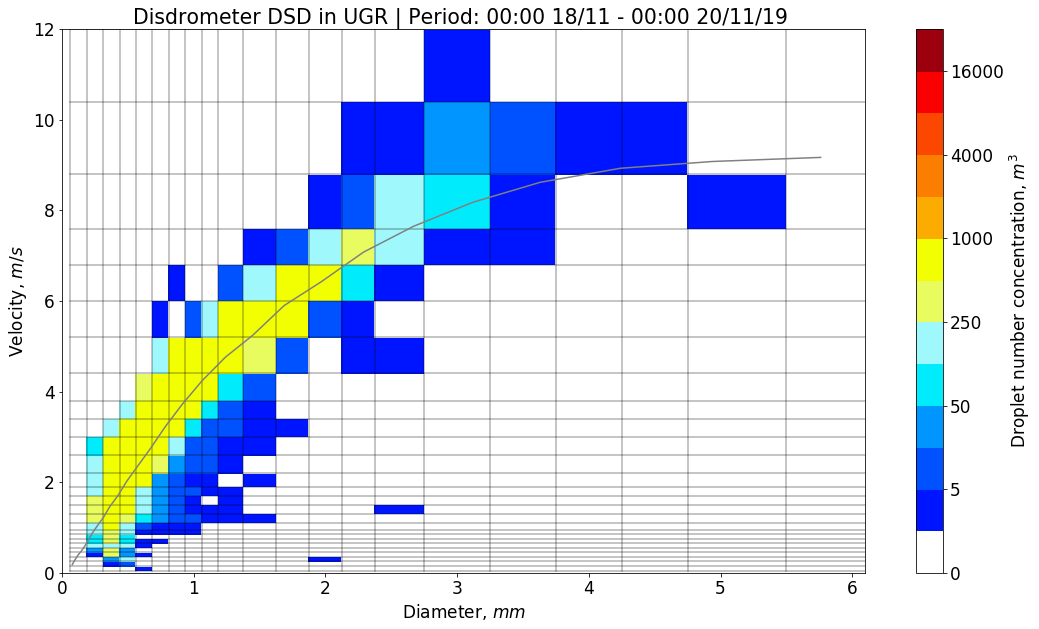

In [85]:
dir1b = 'Y:\\datos\\parsivel\\1b'
figuredir = 'Y:\\datos\\parsivel\\quicklooks'
dateini = '20191118'
dateend = '20191120'
inidate = dd.dt.datetime.strptime(dateini,'%Y%m%d')
enddate = dd.dt.datetime.strptime(dateend,'%Y%m%d')
date_ = dd.dt.datetime.strptime(dateini,'%Y%m%d')
year = dd.dt.datetime.strftime(date_,'%Y')
month = dd.dt.datetime.strftime(date_,'%m')
daterange = [dd.dt.datetime.strftime(inidate,'%Y-%m-%d %H:%M:%S'), dd.dt.datetime.strftime(enddate,'%Y-%m-%d %H:%M:%S')]
print(daterange)
accumulatedSpectrum(dir1b, figuredir, 'UGR', daterange)

In [134]:
def quicklook(variables2plot, mainpath, figuredir, station, daterange, delay=0, plotrange=((0,6),(0,12)),axesTime='Default',size=16):
    """
     quicklook(variables2plot, mainpath, figuredir, station, daterange, delay=0, plotrange=((0,6),(0,12)),axesTime='Default',size=16):

    Esta función realiza las siguientes graficas del disdrometro:           
        1. Distribución de goteo por diametro
        2. Distribución de goteo por velocidad

    NOTA 1: El gráficador puede considerar las horas de retraso de medición del disdrometro (2 horas)

    Variables de entrada:
        1. variables2plot = Variable to make the quicklook. Options: 'diameter' and 'velocity' (str)
        2. PATH= Ruta principal del fichero netcdf (str)
        2. daterange = Es una tupla definida como (date_0,date_f) donde date_o y date_son el rango
           inical y final de graficación respectivamente   (tuple of str)
        3. plotrange = Es una tupla definida como ((dmin,dmax),(vmin,vmax)) que permite modificar el 
           rango de visualización de cada distribución, (dmin,dmax) para modificar el rango de la 
           distribución de goteo por diametro y (vmin,vmax) para modificar el rango de la distribución 
           de goteo por velocidad.
           predefinido como plotrange=((0,6),(0,12))      (tuple of int/float)
        4. delay= Es el tiempo de retraso de medición en horas (0 HORAS POR DEFECTO) (int/float)
        5. size = Tamaño de los encabezados (16 POR DEFECTO) (int/float)

    NOTA 2: las variables date_0 y date_f deben de ser escrita de la forma YYYY-MM-DD hh:mm:ss
           YYYY: Año escrito con 4 digitos
           MM: Numero del mes escrito con 2 digitos
           DD: Dia del mes escrito con 2 digitos
           hh: Hora del dia escrito con 2 digitos
           mm: Minuto de la hora escrito con 2 digitos
           ss: Segundos del minuto escrito con 2 digitos    
    """
    
    def quicklook_DSD(var_, tclasses, data_dates, daterange, plotrange, station, figurepath):
        # FIGURA 1: DISTRIBUCIÓN DE GOTEO POR DIAMETRO
        # Tamaño de la figura
        control = False
        dclasses = [0.062, 0.187, 0.312, 0.437, 0.562, 0.687, 0.812, 0.937, 1.062, 1.187,1.375, 1.625,1.875, 2.125, 2.375, 2.750, 3.250, 3.750, 4.250, 4.750,5.500, 6.500, 7.500, 8.500,9.500, 11, 13, 15, 17, 19, 21.5, 24.5] # Clases diametro
        vclasses = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.10,1.30, 1.50, 1.70, 1.90,2.20, 2.60, 3.00, 3.40, 3.80, 4.40, 5.20,6.00, 6.80, 7.60, 8.80, 10.4, 12.0, 13.6, 15.2,17.6, 20.8]# Clases velocidad
        var2plot = {'diameter': dclasses, 'velocity': vclasses}
        ylabelstr = {'diameter': 'Rain-droplet diameter, $m$$m$', 'velocity': 'Rain-droplet fall velocity, $m/s$'}
        ylimDict = {'diameter': plotrange[0], 'velocity': plotrange[1]}
                #Extrayendo matriz del espectro por todo el lapso de tiempo
        spectrum_matrix = data_dates.M.values
        # Caculando distribución de goteo por diametro y por velocidad
        spectrum_per_diameter = np.nansum(spectrum_matrix,1)
        spectrum_per_velocity = np.nansum(spectrum_matrix,2)
        I = spectrum_per_diameter.shape[1]
        J = spectrum_per_velocity.shape[1]
    
        # Artilugio para poder graficar las distribuciones 
        droplet_per_diameter = np.array([ list( spectrum_per_diameter[:,i] ) for i in range( I ) ])
        droplet_per_velocity = np.array([ list( spectrum_per_velocity[:,i] ) for i in range( J ) ])
        
        DSD = {'diameter': droplet_per_diameter, 'velocity': droplet_per_velocity}
        
        # Tamaño de la fuente de las etiquetas
        font = {'family': 'normal','size': size} 
        mpl.rc('font', **font)        
        
        fig, axes = plt.subplots(nrows=1, figsize=(18,10)) 
        
        # Colormap
        bounds = [0,1,2,5,10,20,50,100,200,500,700,1000,1200,1500] # Rangos del colormap discreto
        colors = ['#ffffff','#0015ff','#0051ff','#0095ff','#00ebfc','#9ff8fc','#e8fc60','#f2ff00','#fcac00','#fc7e00','#fc4700','#fa0000','#9c000f']  # colores de cada rango en formato HEX
        cm = mpl.colors.ListedColormap(colors)
        norm = mpl.colors.BoundaryNorm(bounds, cm.N)

        colormap = axes.pcolormesh(tclasses,var2plot[var_],DSD[var_],cmap=cm,norm=norm) # genera el colormap

        # Dibuja color map
        PLOT = plt.colorbar(colormap, ax=axes)
        PLOT.ax.set_ylabel('Rain-droplet number concentration, $m^3$')

        # Dibuja el mallado del colormap
        xi, yi = np.meshgrid(tclasses, dclasses)        
        axes.plot(xi.T, yi.T, 'k-', alpha=0.3) # Dibuja la lineas horizontales del mallado
        
        # Etiquetas 
        axes.set_ylabel(ylabelstr[var_])

        if axesTime == 'Default':
            axes.set_xlabel('Time, $HH:MM$')
            # intervalo tiempo (step) en eje del tiempo (step de 1 hora)
            hours = mdates.HourLocator(interval = 1) 
            axes.xaxis.set_major_locator(hours)
            #unidades del eje de tiempo
            h_fmt = mdates.DateFormatter('%H:%M') 
            axes.xaxis.set_major_formatter(h_fmt) 
        elif axesTime == 'Automatic':
            axes.set_xlabel('Time')
        
        # rango de visualiacion
        axes.set_xlim(daterange[0],daterange[1])
        axes.set_ylim(ylimDict[var_][0],ylimDict[var_][1])
        
        datetemp0 = dt.datetime.strptime(daterange[0], '%Y-%m-%d %H:%M:%S')
        datetemp1 = dt.datetime.strptime(daterange[1], '%Y-%m-%d %H:%M:%S')
        year0 = dt.datetime.strftime(datetemp0, '%Y')
        year1 = dt.datetime.strftime(datetemp1, '%Y') 
        if year0 == year1:
            date0 = dt.datetime.strftime(datetemp0, '%H:%M %d/%m')
            date1 = dt.datetime.strftime(datetemp1, '%H:%M %d/%m/%y')                 
        else:
            date0 = dt.datetime.strftime(datetemp0, '%H:%M %d/%m/%y')
            date1 = dt.datetime.strftime(daterange[1], '%H:%M %d/%m/%y')
        axes.set_title('Quicklook %s-DSD in %s | Period: %s - %s ' % (var_, station, date0,date1)) #
       
        fig.autofmt_xdate()
        
        fig.savefig(figurepath, bbox_inches='tight', dpi=100)        
        if os.path.isfile(figurepath):
            print('Figure succesfully created!')
            control = True
        else:
            print('Figure NOT created')
            control = False

        return control
        
    #Main code
    control = False
    TIME_DELAY = delay #HOURS
    dateini = dt.datetime.strptime(daterange[0], '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours= TIME_DELAY)
    dateend = dt.datetime.strptime(daterange[1], '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours= TIME_DELAY)  
    inidate = dt.datetime.strftime(dateini, '%Y%m%d-%H%M%S')    
    enddate = dt.datetime.strftime(dateend, '%Y%m%d-%H%M%S')

    date_ = dateini
    PATH = []
    while date_ < dateend:
        year = dt.datetime.strftime(date_,'%Y')
        month = dt.datetime.strftime(date_,'%m')
        filename = '%s_%s.nc' % (dt.datetime.strftime(date_,'%Y%m%d'), station)
        testfile = os.path.join(mainpath, year, month, filename)        
        if os.path.isfile(testfile):
            PATH.append(testfile)            
            print('Existing file append!: %s' % testfile)
        else:
            print('testfile does not exists: %s' % testfile)
        date_ = date_ + dt.timedelta(days=1)
    
    if PATH:
        #Read files
        data_nc = xr.open_mfdataset(PATH)

        #Select region to plot
        data_dates = data_nc.sel(time=slice(*[dateini,dateend]))
    
        # Mallado del colormap
        tclasses = data_dates.time.values + TIME_DELAY*60*60000000000 # Clases tiempo   

        for var_ in variables2plot:                  
            #Figure output path    
            figurename = 'quicklook_%s_%s_%s_%s.png' % (var_, station, inidate, enddate)
            figurepath = os.path.join(figuredir, figurename) 

            #Check folder exists
            if not os.path.isdir(os.path.dirname(figurepath)):
                os.mkdir(os.path.dirname(figurepath))

            print('Plotting %s' % var_)
            control = quicklook_DSD(var_, tclasses, data_dates, daterange, plotrange, station, figurepath)
            if not control:
                print('ERROR: figure not created: %s' % figurepath)                
    return control

['2019-11-22 00:00:00', '2019-11-23 00:00:00']
Existing file append!: Y:\datos\parsivel\1b\2019\11\20191122_UGR.nc
Plotting diameter
Figure succesfully created!
Plotting velocity
Figure succesfully created!


True

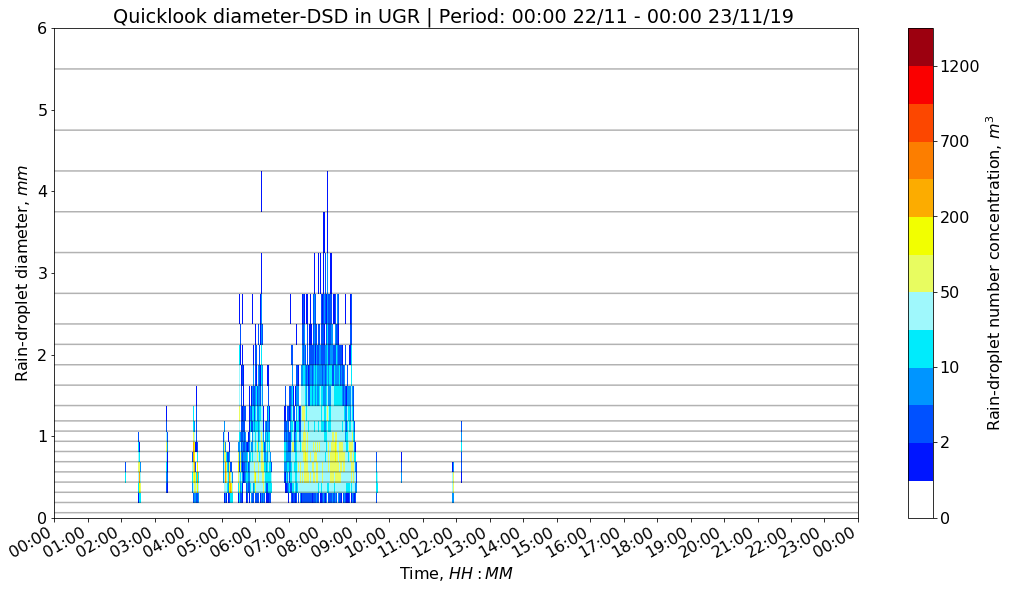

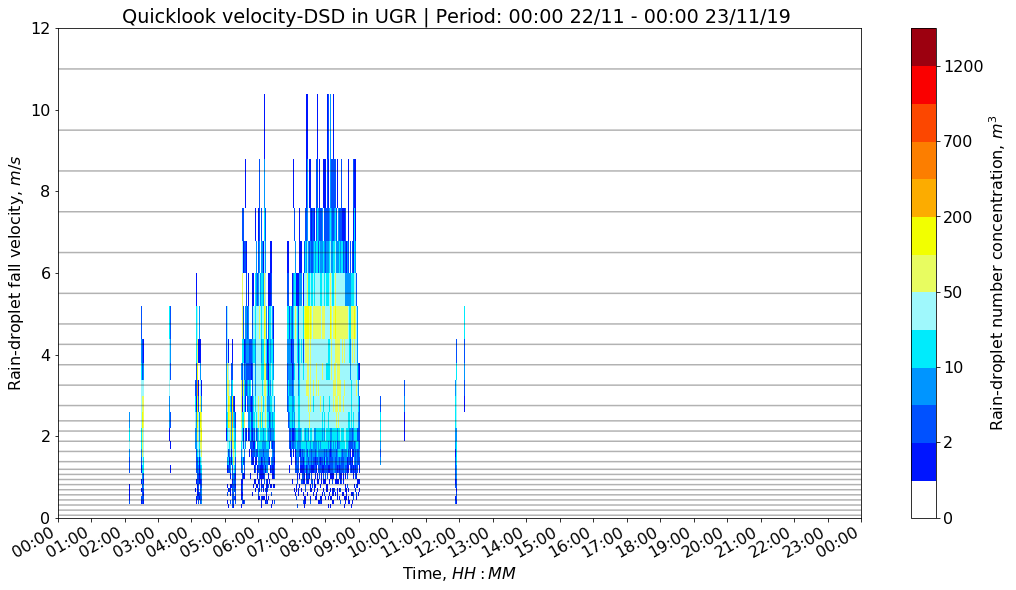

In [135]:
dir1b = 'Y:\\datos\\parsivel\\1b'
figuredir = 'Y:\\datos\\parsivel\\quicklooks'
dateini = '20191122'
dateend = '20191123'
inidate = dd.dt.datetime.strptime(dateini,'%Y%m%d')
enddate = dd.dt.datetime.strptime(dateend,'%Y%m%d')
date_ = dd.dt.datetime.strptime(dateini,'%Y%m%d')
year = dd.dt.datetime.strftime(date_,'%Y')
month = dd.dt.datetime.strftime(date_,'%m')
daterange = [dd.dt.datetime.strftime(inidate,'%Y-%m-%d %H:%M:%S'), dd.dt.datetime.strftime(enddate,'%Y-%m-%d %H:%M:%S')]
print(daterange)
variables2plot = ['diameter', 'velocity']
quicklook(variables2plot, dir1b, figuredir, 'UGR', daterange, delay=0, plotrange=((0,6),(0,12)),axesTime='Default',size=16)